In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
URL = "https://github.com/ageron/handson-ml2/blob/master/datasets/housing/housing.csv?raw=true"
df=pd.read_csv(URL)

In [3]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

X_train = train_set.drop("median_house_value",axis=1)
y = train_set["median_house_value"].copy()

X_num = X_train.drop("ocean_proximity",axis=1)
X_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542
...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192


In [4]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, x , y=None):
        return self
    def transform(self, x):
        rooms_per_household = x[:, rooms_ix]/x[:, households_ix]
        population_per_household = x[:, population_ix]/x[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = x[:, bedrooms_ix]/ x[:,rooms_ix]
            return np.c_[x, rooms_per_household,population_per_household]
        else:
            return np.c_[x, rooms_per_household,population_per_household]

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('attribs_adder',CombinedAttributesAdder(add_bedrooms_per_room=True)),
    ('std_scaler',StandardScaler())
])
num_pipeline.fit_transform(X_num)

array([[ 1.27258656, -1.3728112 ,  0.34849025, ..., -0.326196  ,
        -0.17491646,  0.05137609],
       [ 0.70916212, -0.87669601,  1.61811813, ..., -0.03584338,
        -0.40283542, -0.11736222],
       [-0.44760309, -0.46014647, -1.95271028, ...,  0.14470145,
         0.08821601, -0.03227969],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ..., -0.49697313,
        -0.60675918,  0.02030568],
       [-1.18553953,  0.90651045, -1.07984112, ...,  0.96545045,
         0.40217517,  0.00707608],
       [-1.41489815,  0.99543676,  1.85617335, ..., -0.68544764,
        -0.85144571, -0.08535429]])

In [6]:
from sklearn.compose import ColumnTransformer

num_attribs = list(X_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num',num_pipeline,num_attribs),
    ('cat',OneHotEncoder(),cat_attribs)
])

In [7]:
X_prepared = full_pipeline.fit_transform(X_train)

In [8]:
X_prepared

array([[ 1.27258656, -1.3728112 ,  0.34849025, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.70916212, -0.87669601,  1.61811813, ...,  0.        ,
         0.        ,  1.        ],
       [-0.44760309, -0.46014647, -1.95271028, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ...,  0.        ,
         0.        ,  0.        ],
       [-1.18553953,  0.90651045, -1.07984112, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41489815,  0.99543676,  1.85617335, ...,  0.        ,
         1.        ,  0.        ]])

In [9]:
#Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()

In [11]:
LR_model.fit(X_prepared, y)

LinearRegression()

In [12]:
test_data= X_train.sample(10)
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14624,-117.17,32.77,35.0,1399.0,274.0,695.0,281.0,3.7670,NEAR OCEAN
18712,-122.45,40.61,17.0,785.0,155.0,417.0,136.0,2.3289,INLAND
10133,-117.91,33.91,34.0,1763.0,303.0,894.0,297.0,5.0096,<1H OCEAN
16059,-122.49,37.76,48.0,1351.0,270.0,650.0,265.0,3.5278,NEAR BAY
9647,-120.84,37.05,8.0,1944.0,283.0,814.0,276.0,5.3988,INLAND
1890,-120.01,38.93,22.0,3080.0,610.0,1045.0,425.0,2.9960,INLAND
7268,-118.22,33.98,27.0,1095.0,340.0,1300.0,318.0,2.6548,<1H OCEAN
3449,-118.43,34.32,34.0,2657.0,515.0,1948.0,532.0,4.2330,<1H OCEAN
17596,-121.88,37.31,28.0,3085.0,552.0,1277.0,512.0,4.5795,<1H OCEAN
19987,-119.32,36.20,25.0,1427.0,246.0,772.0,221.0,2.2262,INLAND


In [13]:
test_label = y.loc[test_data.index]
test_label

,median_house_value
14624,166800.0
18712,58200.0
10133,221700.0
16059,339800.0
9647,165500.0
1890,126100.0
7268,123200.0
3449,157400.0
17596,262800.0
19987,64500.0


In [14]:
test_data_prepared = full_pipeline.transform(test_data)
predicted_labels=LR_model.predict(test_data_prepared)

In [15]:
predicted_labels

array([232111.94484819,  47672.98046743, 261558.21017966, 245184.45036873,
       206913.6858737 ,  78329.41205409, 158416.94571174, 221953.83079066,
       271648.36833323,  80095.51893947])

In [16]:
pd.DataFrame({"Bashorat":predicted_labels,'Real baxosi':test_label})

,Bashorat,Real baxosi
14624,232111.944848,166800.0
18712,47672.980467,58200.0
10133,261558.210180,221700.0
16059,245184.450369,339800.0
9647,206913.685874,165500.0
1890,78329.412054,126100.0
7268,158416.945712,123200.0
3449,221953.830791,157400.0
17596,271648.368333,262800.0
19987,80095.518939,64500.0


#5-QADAM. Modelni baholash

In [17]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,263300.0,<1H OCEAN
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,266800.0,NEAR OCEAN
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,500001.0,<1H OCEAN
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,72300.0,INLAND


In [18]:
X_test = test_set.drop('median_house_value', axis=1)
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,<1H OCEAN
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,NEAR OCEAN
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,<1H OCEAN
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,INLAND


In [19]:
y_test = test_set['median_house_value'].copy()
y_test

,median_house_value
20046,47700.0
3024,45800.0
15663,500001.0
20484,218600.0
9814,278000.0
...,...
15362,263300.0
16623,266800.0
18086,500001.0
2144,72300.0


In [20]:
X_test_prepapred = full_pipeline.transform(X_test)

In [21]:
y_predicted = LR_model.predict(X_test_prepapred)

In [22]:
y_predicted

array([ 51809.44720865, 129199.97279161, 267570.93719604, ...,
       439209.09136568, 121261.48178239, 181937.84269135])

In [23]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_predicted)
print("MAE=",mae)

MAE= 50549.97538101806


In [24]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_predicted)
print("RMSE=",np.sqrt(mse))

RMSE= 69829.55973661701


#Random Forest

In [25]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(X_prepared, y)

RandomForestRegressor()

In [26]:
y_predicted = RF_model.predict(X_test_prepapred)

In [27]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_predicted)
print("RMSE=",np.sqrt(mse))

RMSE= 49740.26910510275


#Cross-Validation
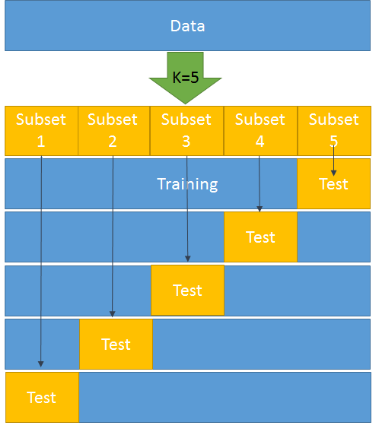

In [28]:
x = df.drop('median_house_value',axis=1)
y= df['median_house_value'].copy()
X_prepared = full_pipeline.transform(x)

In [29]:
from sklearn.model_selection import cross_val_score

mse_scores=cross_val_score(LR_model, X_prepared,y,scoring='neg_mean_squared_error',cv=5)

In [30]:
def display_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Std.dev:",scores.std())

In [31]:
display_scores(np.sqrt(-mse_scores))

Scores: [73401.19764061 75581.27411762 75683.05859845 77187.0334304
 66369.43104269]
Mean: 73644.39896595514
Std.dev: 3832.549610068917


In [32]:
scores = cross_val_score(RF_model, X_prepared, y, scoring='neg_mean_squared_error',cv=10)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [98985.09230109 47400.15013967 65296.0715041  56600.11059895
 61250.22694058 60834.67847735 47024.26143285 78561.73409701
 74503.49492166 49343.21829132]
Mean: 63979.903870459646
Std.dev: 15488.353018658916


#pickle

In [33]:
import pickle

filename = 'RF_model.pkl'
with open(filename,'wb') as file:
    pickle.dump(RF_model,file)

In [34]:
with open(filename,'rb') as file:
    model=pickle.load(file)

#joblib

In [35]:
import joblib

filename = 'LR_mode.jbl'#faylga istalgan nom beramiz
joblib.dump(LR_model, filename)

['LR_mode.jbl']

In [36]:
model = joblib.load(filename)

In [37]:
scores = cross_val_score(model, X_prepared, y, scoring='neg_mean_squared_error',cv=5)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [73401.19764061 75581.27411762 75683.05859845 77187.0334304
 66369.43104269]
Mean: 73644.39896595514
Std.dev: 3832.549610068917
